# King County Housing EDA

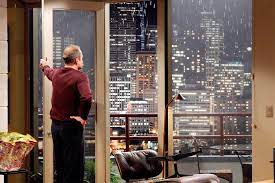

# 0. Importing modules

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import geopandas as gpd
import re
from scipy.spatial.distance import cdist
import calendar
import matplotlib.patches as mpatches


plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

# 1. Data

## We are looking at a Data Set containing information about home sales in King County (USA)

#### So how does the data look like. Lets see!

In [2]:

df = pd.read_csv('data/King_County_House_prices_dataset.csv')
zip_shape_df = gpd.read_file('data/Zipcodes/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.shp') #loading some geo information about the zip areas in king county
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,...,8,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,...,8,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,...,7,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,1/16/2015,400000.000,3,2.500,1600,2388,2.000,NaN,0.000,...,8,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287


We have 21 data columns with 21597 rows of data. 

### Lets get some more information about the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Most of the columns are numbers but two of the columns use the datatype 'object': 'date' which could be the date as a string, and 'sqft_basement' lets find out later why this is the case

Also there are 3 columns with NaN values, we later should think about how we will handle with this NaNs

### Lets get some short descriptive statistics about the data set

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


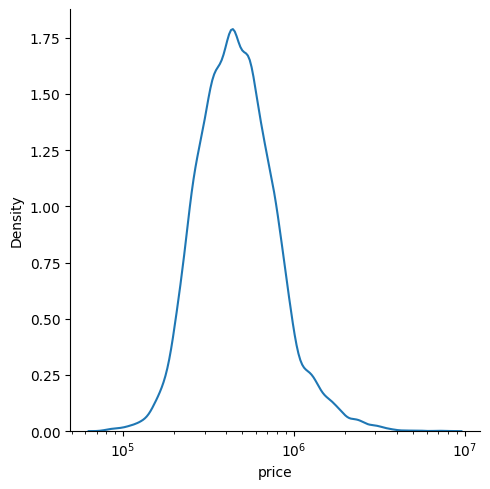

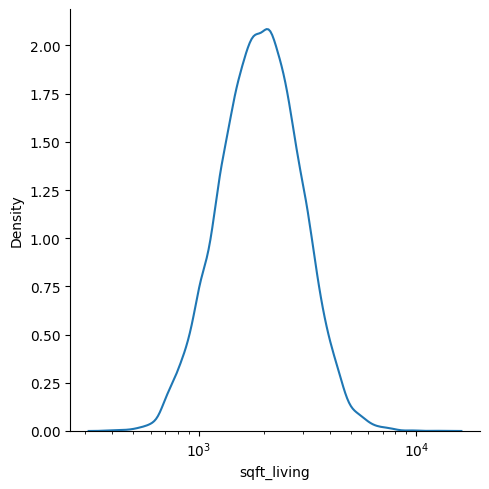

In [4]:
p = sns.displot(data=df.price, kind='kde',log_scale = (True,False))
p = sns.displot(data=df.sqft_living, kind='kde',log_scale = (True,False))
df.describe()

# 2. Hypotheses

### Lets think about three hypthoses we could ask us:

* buying a house in a city is more pricy than buying a house in the country side.
* The King County House grade have a big effect on house prices
* the house prices depend on the season of year


#### Also we want to help our stakeholder Thomas Hansen to buy a house. Here are some important things about Thomas:
* Thomas is mid-age with a badly paid job at a callcenter
* thomas is marired and has 5 children
* Thomas likes to live in a social environment
* Thomas needs a house for his family so with 5 childrens the least number of bedrooms should be 3 + 1 for him and his wife
* A plus for him could be a house near a school with a good school rating


#### Thomas wants to buy a house but has little money. He needs help with buying a house. So this three recommendations he needs:
* Best locations for cheap houses, which are social friendly
* Best time of the year to buy a house
* What features does he have to live without in order to find an affordable house?

# 3. Data Cleaning

In [5]:
df.date = pd.to_datetime(df.date)
df.yr_renovated = pd.to_datetime(df.yr_renovated)

In [6]:
# See what other character can be found in the sqft_basement column
df[df.sqft_basement.str.findall('[^0-9.]+').str.len() != 0].sqft_basement.unique()

array(['?'], dtype=object)

We now know that the column is no float object because there are rows with an "?" instead of a number

We can replace the ? with a NaN

In [7]:
df.sqft_basement = df.sqft_basement.replace('?',np.NaN)
df.sqft_basement = pd.to_numeric(df.sqft_basement)
df.sqft_basement.info()



<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: sqft_basement
Non-Null Count  Dtype  
--------------  -----  
21143 non-null  float64
dtypes: float64(1)
memory usage: 168.9 KB


Let's look for NaN's and what we can do with them

In [8]:
df.columns[df.isna().any()].tolist() #columns with NaNs
df.isna().sum()/df.shape[0]*100

#df.view[df.view != 0]


id               0.000
date             0.000
price            0.000
bedrooms         0.000
bathrooms        0.000
sqft_living      0.000
sqft_lot         0.000
floors           0.000
waterfront      11.002
view             0.292
condition        0.000
grade            0.000
sqft_above       0.000
sqft_basement    2.102
yr_built         0.000
yr_renovated    17.790
zipcode          0.000
lat              0.000
long             0.000
sqft_living15    0.000
sqft_lot15       0.000
dtype: float64

* yr_renovated could be NaN because the house was not renovated yet. We can leave the NaNs but keep them in mind when working with this column.
* sqft_basement: For this column we can calculate the missing numbers by assuming that the basement_space = living_space - above_space
* the small percentage (0.3 %) of missing values of view will not be changed for now
* for waterfront lets have a look at the map and see if one of the houses with missing values is actually near water!!! change this to other approach


As you could see it seems that there are houses right at the water. 

What we will do next is to find out the nearest houses to the houses with waterfront = NaN

Than we will replace the NaN value with the Value of the nearest house.

In [9]:
def closest_point(point, points):
    """ Find closest point from a list of points. """
    return points[cdist([point], points).argmin()]


df['point'] = [(x, y) for x,y in zip(df['long'], df['lat'])]

df_water_nan = df[df.waterfront.isna()]
df_water_notnan = df[df.waterfront.notna()]



df_water_nan['closest'] = [closest_point(x, list(df_water_notnan['point'])) for x in df_water_nan['point']]
df_water_nan_m = df_water_nan.reset_index().merge(df_water_notnan[['waterfront','point']],how = 'left',left_on = 'closest', right_on='point', suffixes = ('_this', '_nearest')).set_index('index')

df = pd.merge(df,df_water_nan_m[['id','waterfront_nearest']],on='id',how='left')

df.waterfront = df.waterfront.fillna(df.waterfront_nearest)
df.waterfront.isna().sum()
df.drop('waterfront_nearest',axis=1,inplace = True)


## create some year/month/weekday columns from the date column

In [10]:
df['year_sold'] = df.date.dt.year
df['month_sold'] = df.date.dt.month
df['weekday_sold'] = df.date.dt.weekday
df['day_sold'] = df.date.dt.day
df['week_month'] = df['day_sold'].apply(lambda d: (d-1) // 7 + 1)
df['time_diff'] = df['year_sold'] - df['yr_built']


# 3. Preparing a Map

[Text(1, 110.0, '<= 110'),
 Text(1, 1355.0, '1355'),
 Text(1, 2600.0, '2600'),
 Text(1, 3845.0, '3845'),
 Text(1, 5090.0, '5090'),
 Text(1, 6335.0, '6335'),
 Text(1, 7580.0, '7580'),
 Text(1, 8825.0, '8825'),
 Text(1, 10070.0, '10070'),
 Text(1, 11315.0, '11315'),
 Text(1, 12560.0, '>= 12560')]

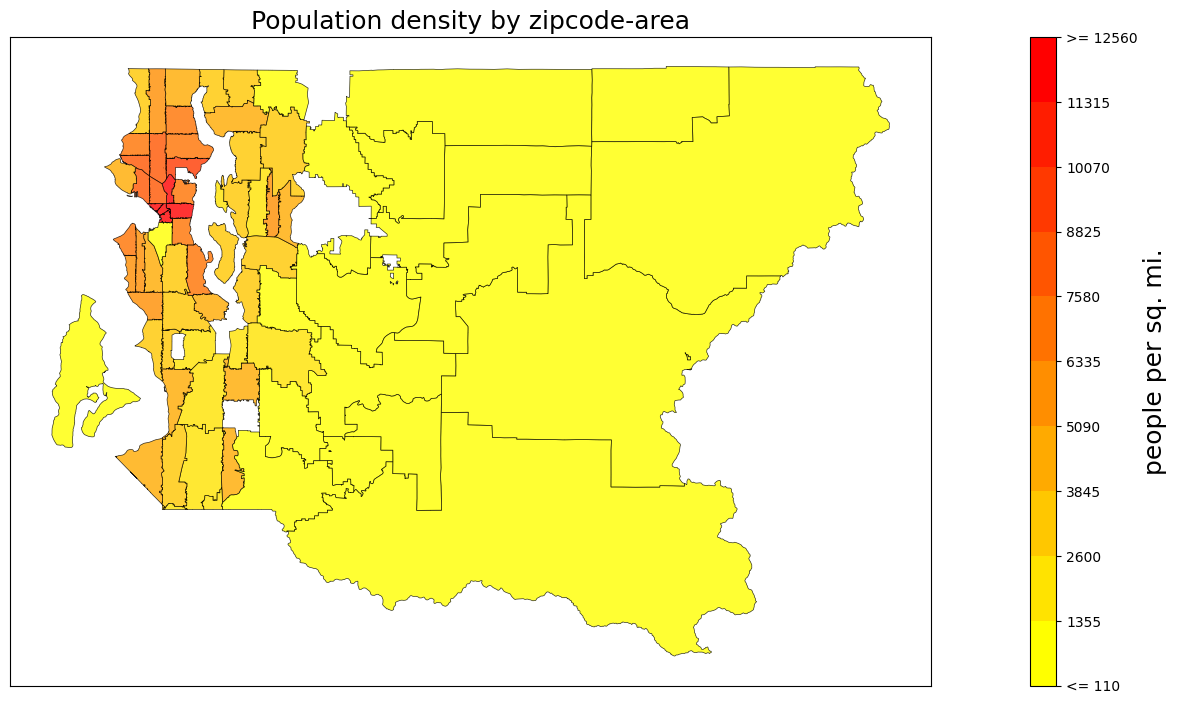

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

zip_shape_df = gpd.read_file('data/Zipcodes/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.shp')
zip_shape_df = zip_shape_df[zip_shape_df.COUNTY_NAM == 'King County']
countys = gpd.read_file('data/us_countys/USA_adm2.shp')
king_county_shape = countys[countys.NAME_2 == 'King'][countys.NAME_1 == 'Washington']
states = gpd.read_file('data/us_countys/USA_adm1.shp')
washington_shape = states[states.NAME_1 == 'Washington']


pop_dens = pd.read_csv('data/us_population_density_by_zip_september2020.csv')
pop_dens = pop_dens.rename({'zip':'ZIP'},inplace=False,axis=1)
zip_shape_df= zip_shape_df.merge(pop_dens[['ZIP','population','population_density']],how='left',on='ZIP')



cmap = plt.cm.autumn_r  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
#cmaplist[0] = (.5, .5, .5, 1.0)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(np.round(zip_shape_df.population_density.quantile(q=0.05),-1), np.round(zip_shape_df.population_density.quantile(q=0.95),-1), 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, clip = True)





#fig, [ax1, ax2]= plt.subplots(1,2,gridspec_kw={'width_ratios': [50, 1]},figsize=(12, 6))
fig, [ax1, ax2] = plt.subplots(1,2,figsize=(10, 4),gridspec_kw={'width_ratios': [50, 1]},)
plt.tight_layout(pad=-10)
#king_county_shape.plot(ax=ax1, color='white', edgecolor='black', linewidth=1, alpha=0.2)
zip_shape_df.plot(ax=ax1, edgecolor='black', alpha=0.8, column='population_density',cmap=cmap,categorical = False,linewidth=0.5,norm = norm,legend=False)

cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
     spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

ax1.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 

ax1.set_title('Population density by zipcode-area', size=18)
ax2.set_ylabel('people per sq. mi.', size=18)

labels = [item.get_text() for item in ax2.get_yticklabels()]
labels[0] = '<= ' + labels[0]
labels[-1] = '>= ' + labels[-1] 
ax2.set_yticklabels(labels)

# 

## Group the data by zipcode

In [12]:

df_zip = df.groupby('zipcode').mean().reset_index().merge(zip_shape_df[['ZIP','population','population_density']],left_on='zipcode',right_on='ZIP')
df_zip.drop('ZIP',axis=1,inplace=True)


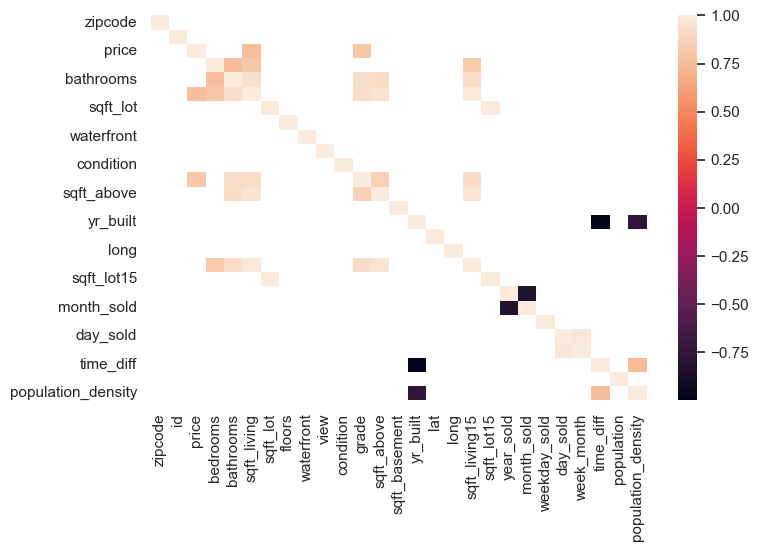

In [13]:

#sns.jointplot(ax=ax,data=df_zip,x='population',y='price', kind="kde")
sns.set(style="white")
g= sns.heatmap(df_zip.corr()[np.abs(df_zip.corr()) > 0.75])
cr = df_zip.corr()
cr = cr[np.abs(cr) > 0.75]

## Group by year, month, weekday

(-48227.8066254879, 48227.8066254879)

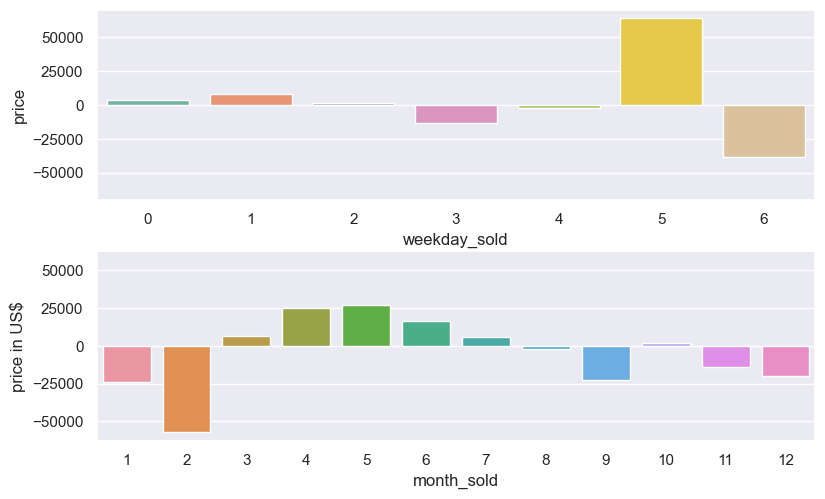

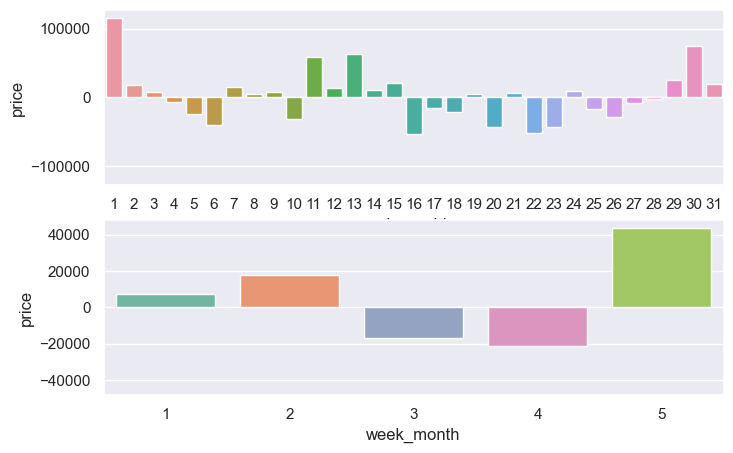

In [35]:

df_s = df[df.bedrooms > 3][df.bedrooms < 7]
dm_weekday = df_s.groupby('weekday_sold').mean() - df_s.price.mean()
dm_month = df_s.groupby('month_sold').mean() - df_s.price.mean()
dm_day = df_s.groupby('day_sold').mean() - df_s.price.mean()
dm_week_month = df_s.groupby('week_month').mean() - df_s.price.mean()

fig, [ax1,ax2] = plt.subplots(2,1)
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.tight_layout()

f1 = sns.barplot(data=dm_weekday,x=dm_weekday.index,y=dm_weekday.price,ax=ax1)
f2 = sns.barplot(data=dm_month,x=dm_month.index,y=dm_month.price,ax=ax2)

f1.set_ylim(- dm_weekday.price.max() * 1.1,dm_weekday.price.max() * 1.1)
f2.set_ylim(- dm_month.price.abs().max() * 1.1,dm_month.price.abs().max() * 1.1)
f2.set_ylabel('price in US$')



fig, [ax3,ax4] = plt.subplots(2,1)
f3 = sns.barplot(data=dm_day,x=dm_day.index,y=dm_day.price,ax=ax3)
f4 = sns.barplot(data=dm_week_month,x=dm_week_month.index,y=dm_week_month.price,ax=ax4)

f3.set_ylim(- dm_day.price.abs().max() * 1.1,dm_day.price.abs().max() * 1.1)
f4.set_ylim(- dm_week_month.price.abs().max() * 1.1,dm_week_month.price.abs().max() * 1.1)

## Binning by Population density
### Answering Hypthoses 1

    zipcode             id       price  bedrooms  bathrooms  sqft_living  \
0     98001 4651273623.072  281194.870     3.393      2.012     1903.784   
1     98002 4850894131.724  234284.035     3.327      1.839     1627.744   
2     98003 4672573484.947  293865.331     3.356      2.047     1927.214   
3     98004 4407859198.031 1354522.343     3.849      2.525     2904.811   
4     98005 4961872170.542  810289.696     3.851      2.424     2656.804   
..      ...            ...         ...       ...        ...          ...   
65    98177 3934998241.741  676419.392     3.396      2.100     2323.333   
66    98178 4291467000.687  310612.756     3.305      1.732     1729.351   
67    98188 4480464026.616  288902.210     3.435      1.868     1807.370   
68    98198 5161308956.078  302744.082     3.185      1.788     1745.662   
69    98199 3410619071.862  789672.589     3.204      2.162     2153.636   

    sqft_lot  floors  waterfront  view  ...  sqft_lot15  year_sold  \
0  14967.003   1.

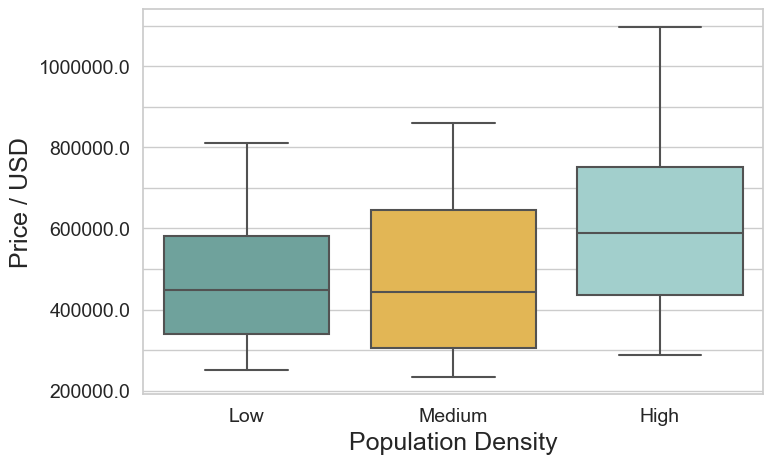

In [15]:
df_zip['q_pop_bins'], bins= pd.qcut(df_zip.population_density,3,retbins=True,labels=['Low','Medium','High'])
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fsize = 18
my_pal = {"Medium": np.array([249, 191, 62])/255, "Low": np.array([102, 170, 162])/255, "High":np.array([154, 215, 210])/255}
sns.boxplot(x ='q_pop_bins',y='price',data=df_zip,ax=ax,showfliers = False, palette=my_pal)
ax.set_xlabel('Population Density', fontsize = fsize)
ax.set_ylabel('Price / USD', fontsize = fsize)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(np.arange(2e5, 1.2e6, 1e5),labels=['' if x/1e5%2 else str(x) for x in np.arange(2e5, 1.2e6, 1e5)],fontsize = fsize-4)
plt.xticks(fontsize = fsize-4)
#mpl.rcParams['figure.dpi'] = 300
print(df_zip)

## House prices correlate with the age of the house

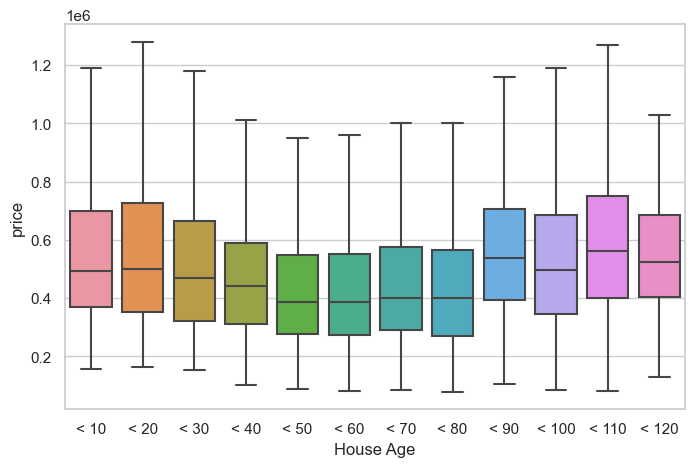

In [16]:
df['time_diff_bins'], bins= pd.cut(df.time_diff,list(range(0,130,10)),retbins=True, labels=['< 10','< 20','< 30','< 40','< 50','< 60','< 70','< 80','< 90','< 100','< 110','< 120'])
fig, ax = plt.subplots()
sns.boxplot(data=df,x='time_diff_bins',y='price',showfliers = False)
ax.set_xlabel('House Age')
plt.show()

# Feature Selection
### What features do you have to forego in order to get an affordable house?
#### First of all we want so only select the houses with more than 3 bedrooms 

In [17]:
family_houses = df[df.bedrooms > 3][df.bedrooms < 7]


have a look where we can find most of these houses. Lets group by Zipcode

In [21]:
fam_house_zip = family_houses.groupby('zipcode').size().reset_index()
#Merge the number of houses into the zip_shape_df
zip_shape_fam_houses = pd.merge(zip_shape_df,fam_house_zip, left_on = 'ZIP', right_on = 'zipcode')
zip_shape_fam_houses = zip_shape_fam_houses.set_axis([*zip_shape_fam_houses.columns[:-1], 'Num_of_fam_houses'], axis=1, inplace=False).sort_values(by='Num_of_fam_houses',ascending=False)
zip_shape_fam_houses.head()


fam_house_zip = family_houses.groupby('zipcode').median().reset_index()
#Merge the number of houses into the zip_shape_df
zip_shape_fam_houses = pd.merge(zip_shape_fam_houses,fam_house_zip[['zipcode','sqft_living','sqft_lot','price']], left_on = 'ZIP', right_on = 'zipcode')
zip_shape_fam_houses = zip_shape_fam_houses.set_axis([*zip_shape_fam_houses.columns[:-1], 'Mean_price'], axis=1, inplace=False).sort_values(by='Mean_price',ascending=True)
zip_shape_fam_houses.drop(['ZIP', 'zipcode_x','zipcode_y'],axis = 1).head()

,OBJECTID,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAM,PREFERRED_,Shape_Leng,Shape_Area,geometry,population,population_density,Num_of_fam_houses,sqft_living,sqft_lot,Mean_price
53,2,98002,033,Standard,King County,AUBURN,105168.477,204445228.298,"POLYGON ((-122.22921 47.35375, -122.22915 47.3...",30815.000,4053.550,67,2120.000,7665.000,269950.000
52,94,98168,033,Standard,King County,SEATTLE,105513.044,258959463.097,"POLYGON ((-122.29151 47.51370, -122.29188 47.5...",30198.000,3295.070,71,1850.000,8500.000,273500.000
61,28,98032,033,Standard,King County,KENT,162578.138,480428912.045,"MULTIPOLYGON (((-122.24187 47.44122, -122.2411...",28778.000,1726.830,50,2190.000,8668.500,282963.500
42,100,98198,033,Standard,King County,SEATTLE,120954.751,212912872.253,"POLYGON ((-122.31455 47.42435, -122.31454 47.4...",33561.000,4488.330,92,2050.000,8959.000,294691.000
21,1,98001,033,Standard,King County,AUBURN,148134.771,526121353.974,"POLYGON ((-122.22992 47.35377, -122.22993 47.3...",25771.000,1408.910,150,2185.500,8027.000,295750.000


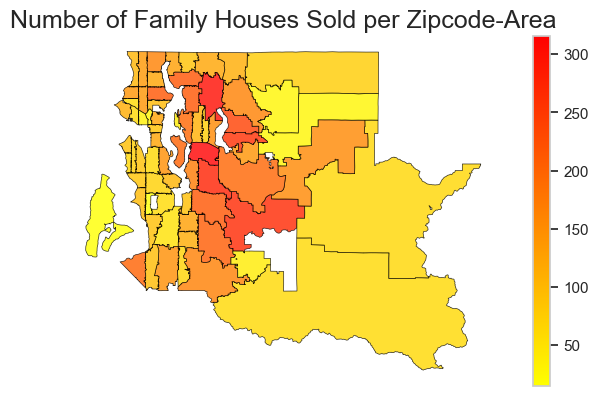

In [28]:
fig, ax1 = plt.subplots(1,1,figsize=(10, 4))
plt.tight_layout(pad=-10)
#king_county_shape.plot(ax=ax1, color='white', edgecolor='black', linewidth=1, alpha=0.2)
zip_shape_fam_houses.plot(ax=ax1, edgecolor='black', alpha=0.8, column=zip_shape_fam_houses.Num_of_fam_houses,cmap='autumn_r',categorical = False,linewidth=0.5,legend=True)
ax1.set_title('Number of Family Houses Sold per Zipcode-Area',fontsize = 18)
plt.axis('off')
fig.set_size_inches(5, 2)

### Also we can take a look a the Areas with the cheapest Family houses

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAM,PREFERRED_,Shape_Leng,Shape_Area,geometry,population,population_density,zipcode_x,Num_of_fam_houses,zipcode_y,sqft_living,sqft_lot,Mean_price
53,2,98002,98002,033,Standard,King County,AUBURN,105168.477,204445228.298,"POLYGON ((-122.22921 47.35375, -122.22915 47.3...",30815.000,4053.550,98002,67,98002,2120.000,7665.000,269950.000
52,94,98168,98168,033,Standard,King County,SEATTLE,105513.044,258959463.097,"POLYGON ((-122.29151 47.51370, -122.29188 47.5...",30198.000,3295.070,98168,71,98168,1850.000,8500.000,273500.000
61,28,98032,98032,033,Standard,King County,KENT,162578.138,480428912.045,"MULTIPOLYGON (((-122.24187 47.44122, -122.2411...",28778.000,1726.830,98032,50,98032,2190.000,8668.500,282963.500


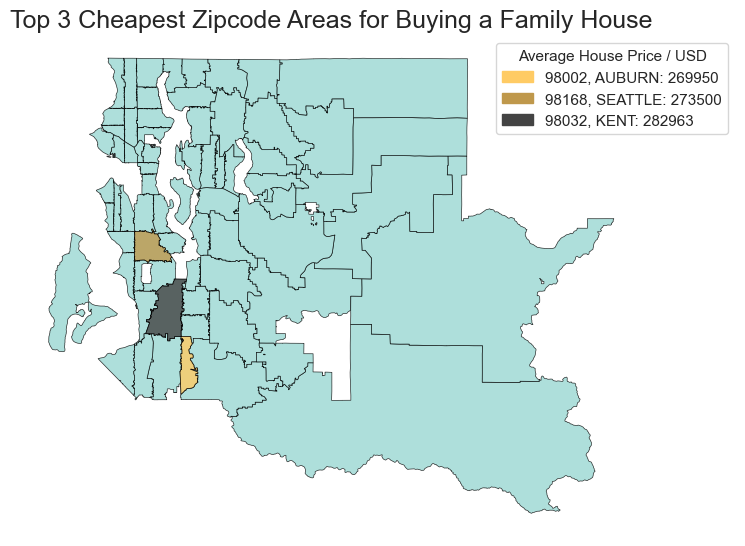

In [29]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(4, 2),width_ratios=[10,1])
plt.tight_layout(pad = -10)
#king_county_shape.plot(ax=ax1, color='white', edgecolor='black', linewidth=1, alpha=0.2)
zip_shape_fam_houses.plot(ax=ax1, color = np.array([154, 215, 210])/255, edgecolor='black', alpha=0.8,linewidth=0.5)
cmap = mpl.colors.LinearSegmentedColormap.from_list("", [np.array([255, 203, 100])/255,0.75 * np.array([255, 203, 100])/255,np.array([67, 67, 67])/255])
p = (zip_shape_fam_houses.iloc[:3]
    .plot(ax=ax1, edgecolor='black', alpha=0.8, 
        column=zip_shape_fam_houses.iloc[:3].Mean_price.astype(int),
        cmap = cmap,categorical = True,linewidth=0.5)
    )

ax1.set_title('Top 3 Cheapest Zipcode Areas for Buying a Family House',fontsize = 18)
ax1.axis('off')
ax2.axis('off')
#p.get_legend().set_title('Population Density\npeople per sq. mi.')
#p.get_legend().set_title('Average House price / USD')

#list(p.get_legend_handles_labels().__str__)
#zip_shape_fam_houses.iloc[:3]
# create fake legend because it could not change the labels


a_patch = mpatches.Patch(color=np.array([255, 203, 100])/255, label=zip_shape_fam_houses['ZIPCODE'].iloc[0] + ', ' + zip_shape_fam_houses['PREFERRED_'].iloc[0] + ': ' + str(int(zip_shape_fam_houses['Mean_price'].iloc[0])))
b_patch = mpatches.Patch(color=0.75 * np.array([255, 203, 100])/255, label=zip_shape_fam_houses['ZIPCODE'].iloc[1] + ', ' + zip_shape_fam_houses['PREFERRED_'].iloc[1] + ': ' + str(int(zip_shape_fam_houses['Mean_price'].iloc[1])))
c_patch = mpatches.Patch(color=np.array([67, 67, 67])/255, label=zip_shape_fam_houses['ZIPCODE'].iloc[2] + ', ' + zip_shape_fam_houses['PREFERRED_'].iloc[2] + ': ' + str(int(zip_shape_fam_houses['Mean_price'].iloc[2])))
ax2.legend(handles=[a_patch, b_patch, c_patch],title = 'Average House Price / USD',fontsize = 11, title_fontsize = 11, loc = 'upper right')

#plt.gca().legend([1,2,3],['1','2','3'])

fig.set_size_inches(5, 2)

zip_shape_fam_houses.iloc[:3]